In [31]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tech-layoffs-2020-2024/tech_layoffs.xlsx


In [32]:
import matplotlib.pyplot as plt

In [33]:
dataset = pd.read_excel("/kaggle/input/tech-layoffs-2020-2024/tech_layoffs.xlsx")
dataset.head()

,#,Company,Location_HQ,Country,Continent,Laid_Off,Date_layoffs,Percentage,Company_Size_before_Layoffs,Company_Size_after_layoffs,Industry,Stage,Money_Raised_in_$_mil,Year,lat,lng
0,3,ShareChat,Bengaluru,India,Asia,200,2023-12-20,15.0,1333,1133,Consumer,Series H,$1700,2023,12.97194,77.59369
1,4,InSightec,Haifa,Israel,Asia,100,2023-12-19,20.0,500,400,Healthcare,Unknown,$733,2023,32.81841,34.98850
2,6,Enphase Energy,San Francisco Bay Area,USA,North America,350,2023-12-18,10.0,3500,3150,Energy,Post-IPO,$116,2023,37.54827,-121.98857
3,7,Udaan,Bengaluru,India,Asia,100,2023-12-18,10.0,1000,900,Retail,Unknown,1500,2023,12.97194,77.59369
4,14,Cruise,San Francisco Bay Area,USA,North America,900,2023-12-14,24.0,3750,2850,Transportation,Acquired,$15000,2023,37.77493,-122.41942


In [34]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1418 entries, 0 to 1417
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   #                            1418 non-null   int64         
 1   Company                      1418 non-null   object        
 2   Location_HQ                  1418 non-null   object        
 3   Country                      1418 non-null   object        
 4   Continent                    1418 non-null   object        
 5   Laid_Off                     1418 non-null   int64         
 6   Date_layoffs                 1418 non-null   datetime64[ns]
 7   Percentage                   1418 non-null   float64       
 8   Company_Size_before_Layoffs  1418 non-null   int64         
 9   Company_Size_after_layoffs   1418 non-null   int64         
 10  Industry                     1418 non-null   object        
 11  Stage                        1418 non-null 

In [35]:
#Make Money Raised in $ mil. a float64 variable
dataset['Money_Raised_in_$_mil'] = dataset['Money_Raised_in_$_mil'].apply(lambda x: float(x[1:]) if x[0] == '$' else float(x))
dataset['Money_Raised_in_$_mil'].dtype

dtype('float64')

# My hypotheses to test:
1. Most tech layoffs likely occurred in big tech companies from the US. Perhaps less in other countries?
2. Most layoffs happened in late 2022?
3. All companies laid off a similar percentage?
4. Companies that raised more money laid off less?

# Where did most layoffs occur?

<Axes: xlabel='Country', ylabel='Laid Off'>

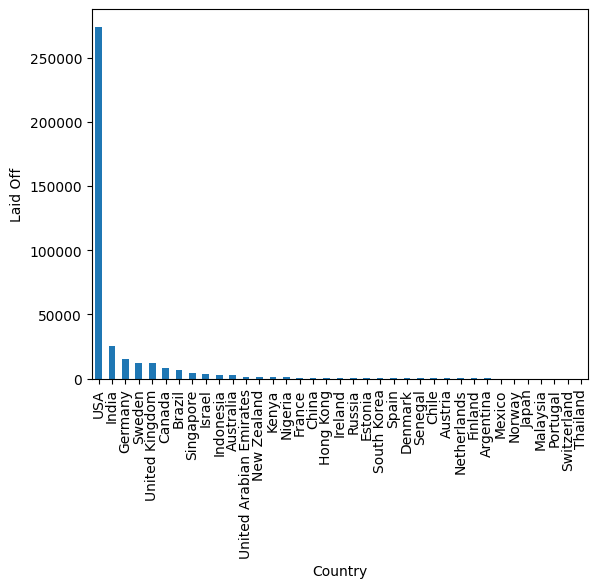

In [36]:
#Which countries had most layoffs?
dataset.groupby('Country')['Laid_Off'].sum().sort_values(ascending=False).plot.bar(ylabel='Laid Off')

<Axes: xlabel='Country', ylabel='Mean % Laid Off'>

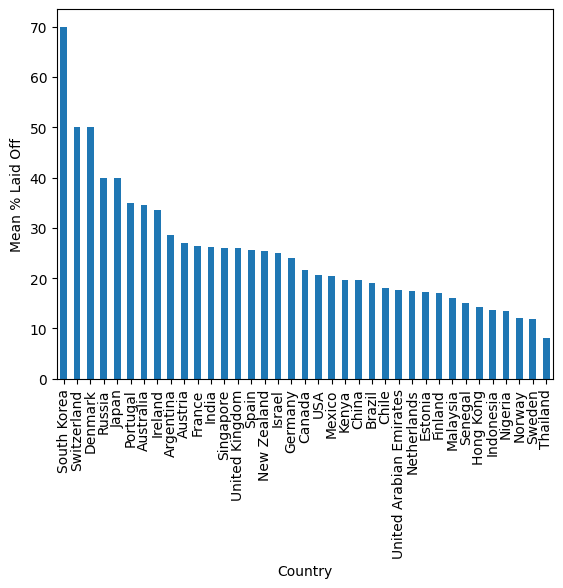

In [38]:
#Mean percentage of layoffs my country
dataset.groupby('Country')['Percentage'].mean().sort_values(ascending=False).plot.bar(ylabel='Mean % Laid Off')

<Axes: xlabel='Continent', ylabel='Mean % Laid Off'>

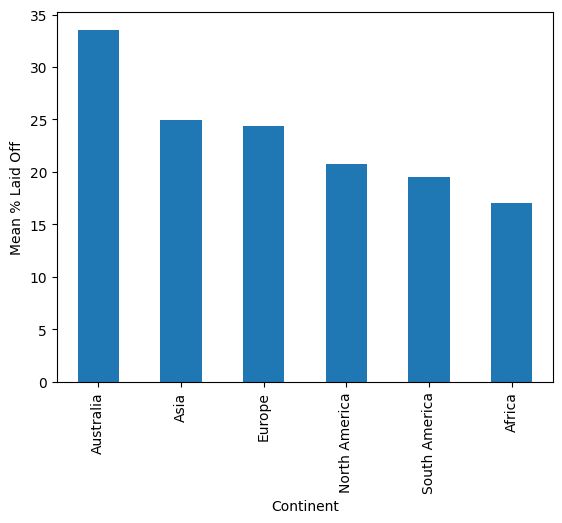

In [40]:
#Mean percentage of layoffs by continent
dataset.groupby('Continent')['Percentage'].mean().sort_values(ascending=False).plot.bar(ylabel='Mean % Laid Off')

The vast majority of tech companies in the dataset are from the US, which is why most layoffs are, naturally, from there. But when we look at the percentages laid off in specific companies, we see that the median layoff percentage is highest in Asia and Australia, and not North America.

# When did most layoffs occur?

Text(0, 0.5, 'Laid Off')

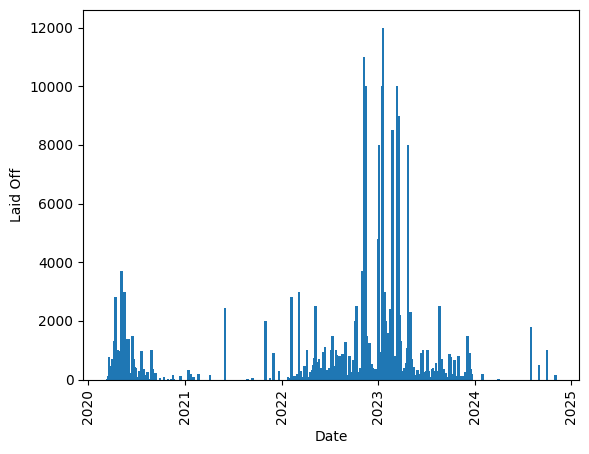

In [41]:
#Layoffs by date
df_tmp = dataset.sort_values('Date_layoffs', ascending=True)
plt.bar(df_tmp['Date_layoffs'], df_tmp['Laid_Off'], width = 10)
plt.xticks(rotation='vertical')
plt.xlabel('Date')
plt.ylabel('Laid Off')

The major layoffs started in late 2022, and continues through early 2023. Interestingly we can see that there was a little pause before New Year (likely for bureaucratic reasons).

# Did all companies lay off a similar percentage?

Mean: 21.90158431069137


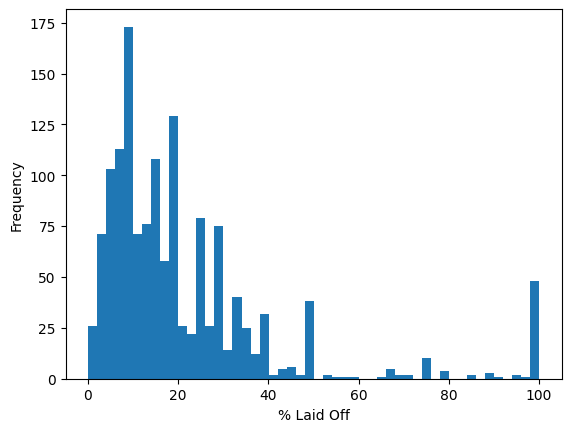

In [69]:
#Mean percentage of layoffs
dataset['Percentage'].plot.hist(bins=50, xlabel='% Laid Off')
print('Mean:', dataset['Percentage'].mean())

The spikes in the percentage histogram are the round percentages (10%, 20%, 50% etc). It is rather suspicious why a company would lay off such a percise percentage, but maybe they were just aiming for it.

Text(0, 0.5, '% Laid Off')

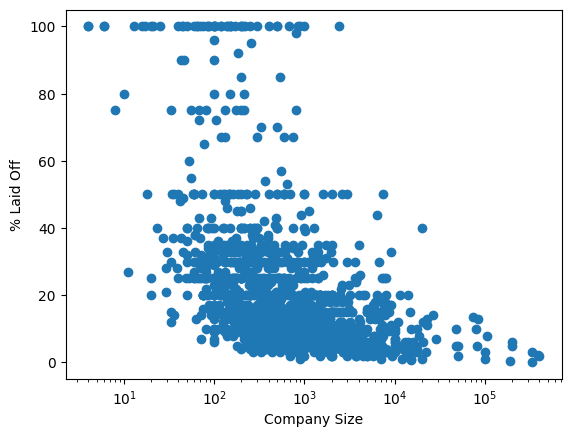

In [43]:
#Relation of percentage laid off to size of company
plt.scatter(dataset['Company_Size_before_Layoffs'], dataset['Percentage'])
plt.xscale('log')
plt.xlabel('Company Size')
plt.ylabel('% Laid Off')

Generally there is no correlation between the size of the company and the percentage it lays off. We can wee that the few biggest companies do not lay off < 20%, while for the rest there is no significant correlation with their size.

# Did companies who raised more money lay off fewer people?

Text(0, 0.5, 'Laid Off')

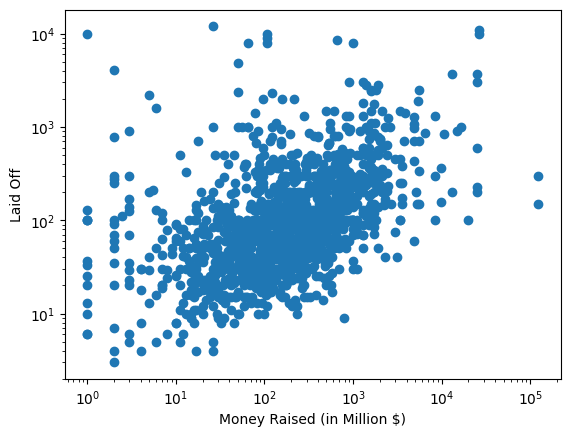

In [44]:
#Relation money raised to size of people laid off
plt.scatter(dataset['Money_Raised_in_$_mil'], dataset['Laid_Off'])
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Money Raised (in Million $)')
plt.ylabel('Laid Off')

It seems that companies that made more money laid off more workers. This seems counterintuitive. Probably due to a strong correlation with company size.
So I tried to adjust for size by seeing if "overcrowded" companies (employees/money made) laid off a larger percentage of workers.

Text(0, 0.5, '% Laid Off')

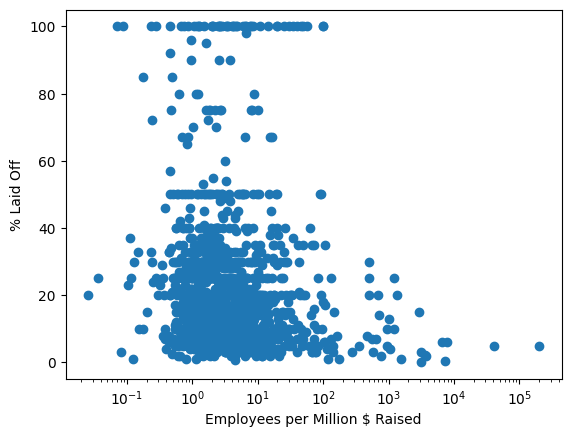

In [45]:
#Represent "crowdedness" with employees per million dollars raised. Compare it to percentage laid off
plt.scatter(dataset['Company_Size_before_Layoffs']/dataset['Money_Raised_in_$_mil'], dataset['Percentage'])
plt.xscale('log')
plt.xlabel('Employees per Million $ Raised')
plt.ylabel('% Laid Off')


Surprisingly, there is a reversed trend even here! While it is not significant, there is clearly a tendency to lay off a higher percentage when a company is LESS crowded.

I also wanted to take a look at the most and least "crowded" companies:

In [21]:
dataset_crowded = dataset[dataset['Company_Size_before_Layoffs']/dataset['Money_Raised_in_$_mil'] > 10**3]

<Axes: xlabel='Company', ylabel='Mean % Laid Off'>

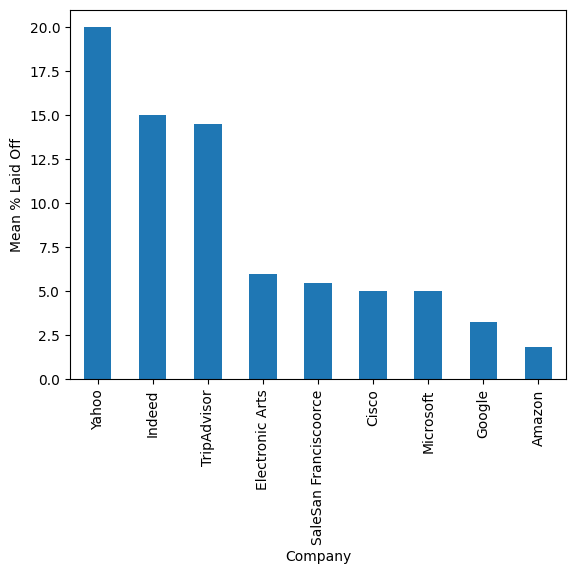

In [46]:
dataset_crowded.groupby('Company')['Percentage'].mean().sort_values(ascending=False).plot.bar(ylabel='Mean % Laid Off')

In [47]:
dataset_uncrowded = dataset[dataset['Company_Size_before_Layoffs']/dataset['Money_Raised_in_$_mil'] < 5*10**-1]

<Axes: xlabel='Company', ylabel='Mean % Laid Off'>

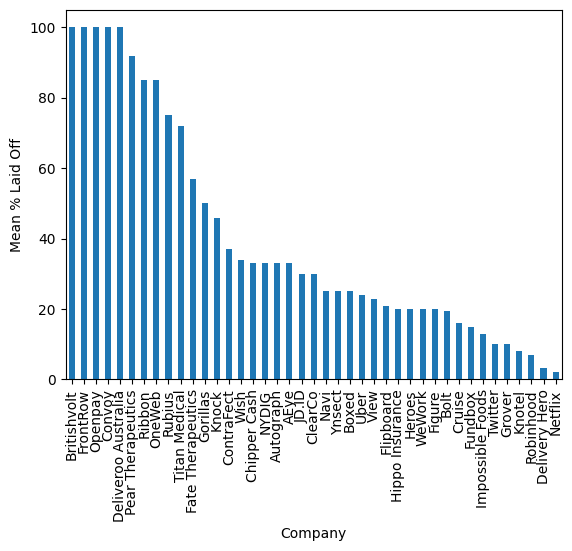

In [48]:
dataset_uncrowded.groupby('Company')['Percentage'].mean().sort_values(ascending=False).plot.bar(ylabel='Mean % Laid Off')